<a href="https://colab.research.google.com/github/BuretGriffin/WEEK9-MORINGA-CORE-BURET-GRIFFIN/blob/main/WEKK9_BURET_GRIFFIN_MORINGASCHOOL_CORE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Defining the Question**

a) Specifying the Data Analytic Question

Determine whether a given email is spam or not.

**b) Defining the Metric for Success**

The project will be a success when we are able to create a model to accurately predicts whether a given email is spam or not.

**c) Understanding the context**

The data available for this project was collected by UCI Machine Learning Centre. It is a collection of spam e-mails that came from their postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

Data Glossary:

48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

**d) Recording the Experimental Design**

The process will entail:

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate and bivariate analysis recording my observations.

Build our classification models using Naive Bayes Classifier.
Do different dataset splits(80-20, 70-30, 60-40) for the train and test sets and make observations of the model performance.
Optimize model performance and challenge the solution
Give a conclusion and recommendations from the analysis.

**e) Data Relevance**

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.

**2. Reading the Data**

In [56]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url ="https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
spam = pd.read_csv(url, sep=',', names=['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'Type'])

**3. Checking the Data**

In [57]:
# Determining the no. of records in our dataset
#

spam.shape

(4601, 58)

In [58]:
# Previewing the top of our dataset
#
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [59]:
# Previewing the bottom of our dataset
# 
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [60]:
# Checking whether each column has an appropriate datatype
#
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [61]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

**5. Tidying the Dataset**

In [62]:
# checking for duplicates
# 
spam.duplicated().sum()

391

In [63]:
spam = spam.drop_duplicates()
spam.shape

(4210, 58)

In [64]:
# Identifying the Missing Data
#
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

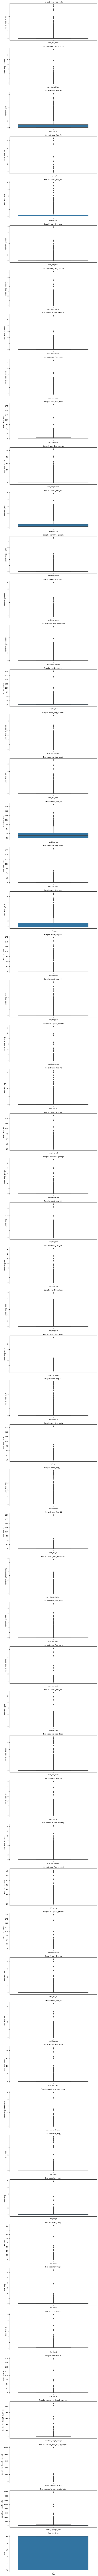

In [65]:
# check for outliers
# 

plt.show()

fig, ax = plt.subplots(len(spam.columns), figsize = (10, 300))

for i, col_val in enumerate(spam.columns):

  sns.boxplot(y= spam[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

In [66]:
for k, v in spam.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(spam)[0]
  # print("Columns %s outliers = %.2f%%" % (k, perc)

**6. Exploratory Analysis**

In [67]:
# plottong a bar chart for the type column
# 
# fig,axes = plt.subplots(figsize=(8,6))
# sns.countplot(spam['Type'])

In [68]:
# getting statistical summary
# 
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [69]:
# finding the median
# 
spam.median().sort_values(ascending=False)

capital_run_length_total      101.500
capital_run_length_longest     15.000
capital_run_length_average      2.297
word_freq_you                   1.360
word_freq_your                  0.290
word_freq_will                  0.190
char_freq_(                     0.073
char_freq_!                     0.016
word_freq_parts                 0.000
word_freq_cs                    0.000
word_freq_direct                0.000
word_freq_pm                    0.000
word_freq_make                  0.000
word_freq_1999                  0.000
word_freq_technology            0.000
word_freq_85                    0.000
word_freq_415                   0.000
word_freq_meeting               0.000
word_freq_re                    0.000
word_freq_original              0.000
word_freq_project               0.000
word_freq_857                   0.000
word_freq_edu                   0.000
word_freq_table                 0.000
word_freq_conference            0.000
char_freq_;                     0.000
char_freq_[ 

In [70]:
# finding the variance
# 
spam.skew().sort_values(ascending=False)

char_freq_#                   31.500180
capital_run_length_longest    31.205495
word_freq_3d                  27.209539
word_freq_parts               27.078694
capital_run_length_average    22.760655
char_freq_[                   21.271982
word_freq_table               19.298485
word_freq_conference          18.871757
char_freq_!                   18.337278
word_freq_project             18.196824
word_freq_85                  16.001762
word_freq_money               15.556682
word_freq_credit              15.430174
char_freq_(                   14.002666
word_freq_telnet              13.514852
word_freq_address             13.464664
char_freq_;                   13.355885
word_freq_data                13.069355
word_freq_pm                  11.762303
word_freq_lab                 11.683591
word_freq_report              11.564142
word_freq_cs                  11.468806
char_freq_$                   10.608970
word_freq_857                 10.432463
word_freq_415                 10.339838


In [71]:
# finding the skewness
# 
spam.skew().sort_values(ascending=False)

char_freq_#                   31.500180
capital_run_length_longest    31.205495
word_freq_3d                  27.209539
word_freq_parts               27.078694
capital_run_length_average    22.760655
char_freq_[                   21.271982
word_freq_table               19.298485
word_freq_conference          18.871757
char_freq_!                   18.337278
word_freq_project             18.196824
word_freq_85                  16.001762
word_freq_money               15.556682
word_freq_credit              15.430174
char_freq_(                   14.002666
word_freq_telnet              13.514852
word_freq_address             13.464664
char_freq_;                   13.355885
word_freq_data                13.069355
word_freq_pm                  11.762303
word_freq_lab                 11.683591
word_freq_report              11.564142
word_freq_cs                  11.468806
char_freq_$                   10.608970
word_freq_857                 10.432463
word_freq_415                 10.339838


In [72]:
# finding kurtosis
# 
spam.kurt().sort_values(ascending=False)

capital_run_length_longest    1471.215610
char_freq_#                   1238.321018
word_freq_parts                836.229272
word_freq_3d                   788.370058
char_freq_[                    664.620378
capital_run_length_average     614.399885
char_freq_!                    579.438464
word_freq_conference           492.146945
word_freq_85                   491.541633
word_freq_project              449.017717
word_freq_table                431.309247
word_freq_credit               424.685771
char_freq_(                    404.370138
word_freq_money                340.175773
word_freq_address              306.685973
word_freq_telnet               302.369897
word_freq_data                 290.736221
word_freq_report               219.645155
word_freq_pm                   205.959198
char_freq_;                    200.449787
word_freq_lab                  189.408655
char_freq_$                    188.462692
word_freq_internet             167.550219
word_freq_cs                   166

In [73]:
correlations = spam.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [74]:
# checking on the highly correlated features
correlation_matrix = spam.corr()
correlated_features=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

print("HIGHLY CORRELATED FEATURES ARE",correlated_features)

HIGHLY CORRELATED FEATURES ARE ['word_freq_415', 'word_freq_direct', 'word_freq_direct']


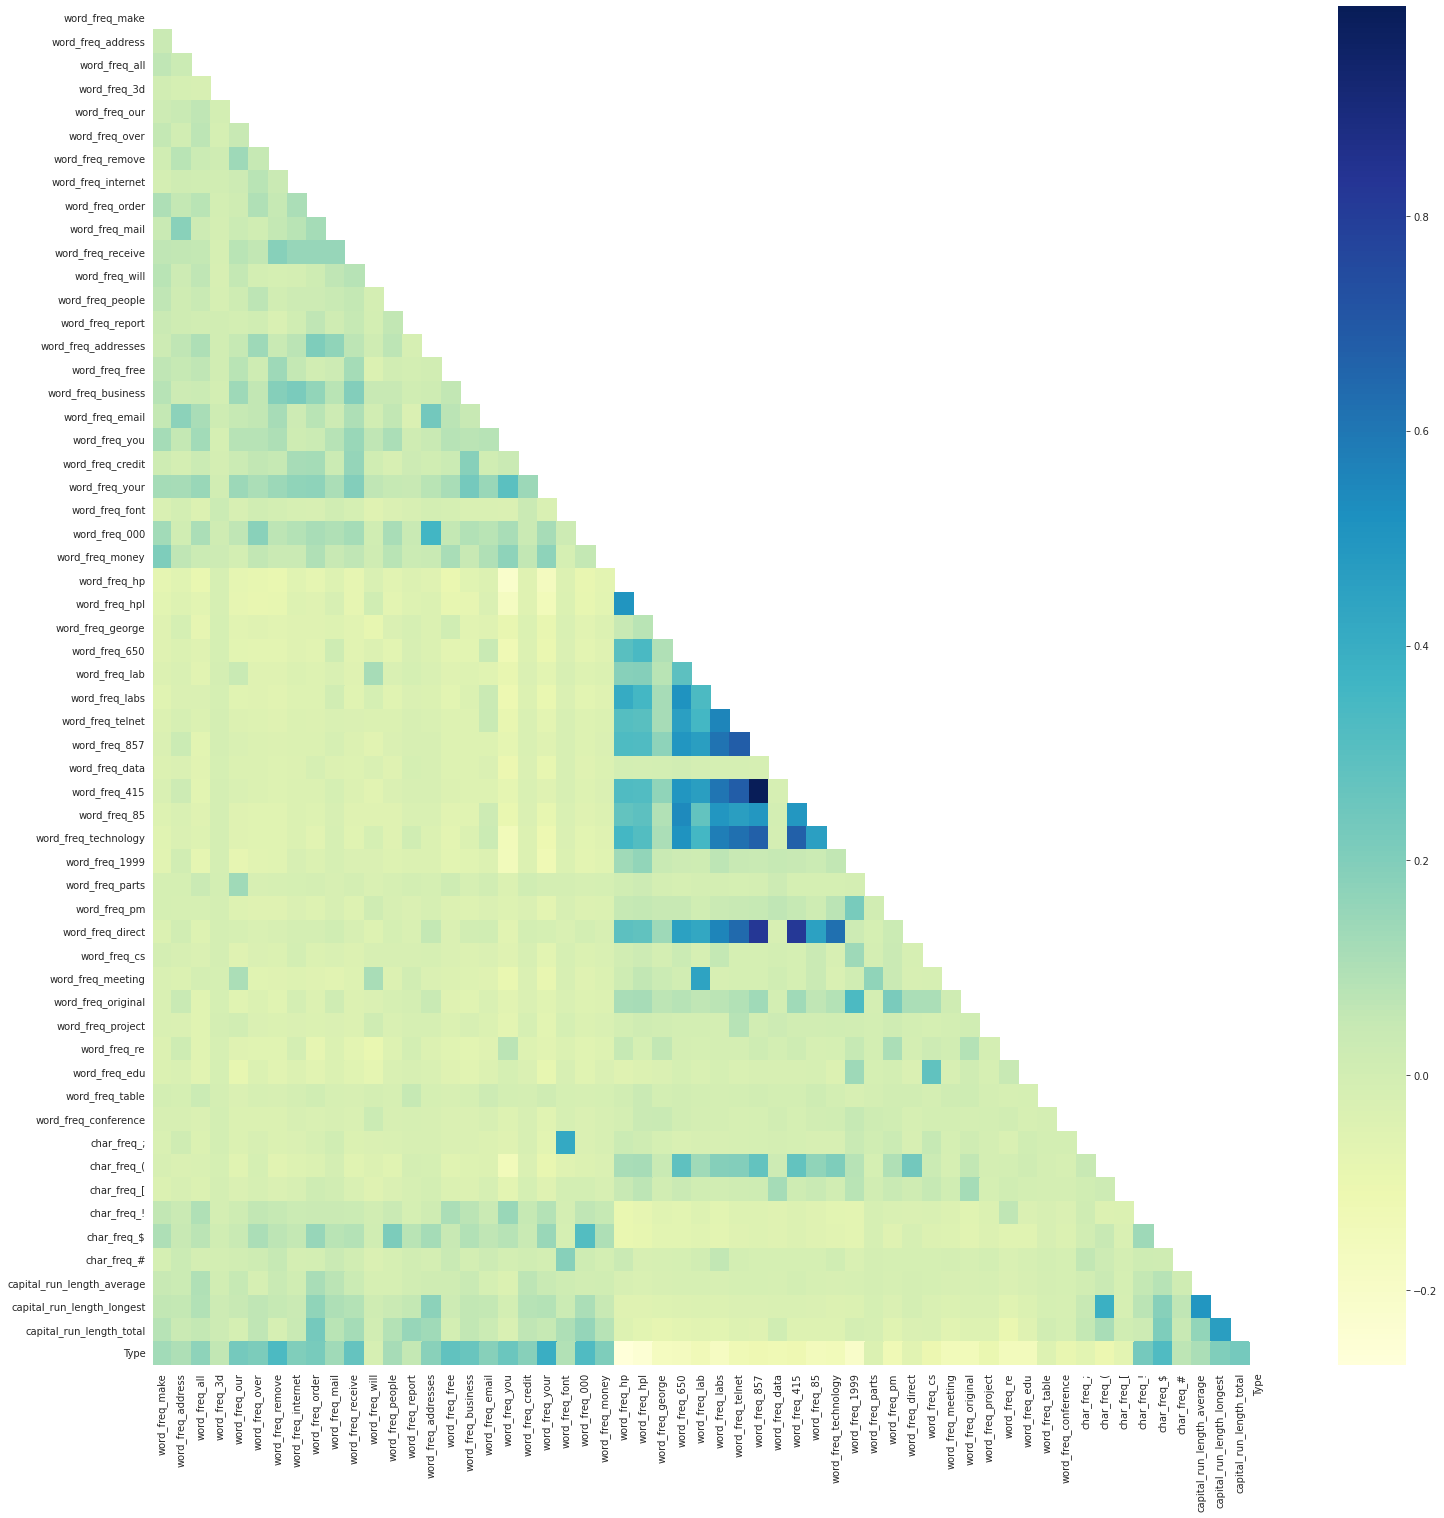

In [75]:
# plotting a heatmap
# 
import seaborn as sns
mask = np.zeros_like(spam.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25,25))
    ax = sns.heatmap(spam.corr(),
mask=mask,annot=False,linecolor='black',cmap="YlGnBu",)

**7. Implementing the Solution**

**Feature Engineering**

Checking for Multicollinearity

In [76]:
# Finding multicollinearity using VIF
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = spam.iloc[:,:-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature         VIF
0               word_freq_make    1.229407
1            word_freq_address    1.173538
2                word_freq_all    1.400882
3                 word_freq_3d    1.006264
4                word_freq_our    1.324950
5               word_freq_over    1.192613
6             word_freq_remove    1.215999
7           word_freq_internet    1.173639
8              word_freq_order    1.314221
9               word_freq_mail    1.275207
10           word_freq_receive    1.293204
11              word_freq_will    1.452327
12            word_freq_people    1.179703
13            word_freq_report    1.078906
14         word_freq_addresses    1.391345
15              word_freq_free    1.174359
16          word_freq_business    1.332468
17             word_freq_email    1.326938
18               word_freq_you    2.108006
19            word_freq_credit    1.115386
20              word_freq_your    1.924680
21              word_freq_font    1.311079
22         

In [77]:
# Dropping the 2 columns with high multicollinearity
# 
spam.drop(['word_freq_857', 'word_freq_415'], axis=1, inplace=True)
spam.shape

(4210, 56)

In [78]:
# Define our x and y
# 
X = spam.iloc[:,:-1]
y = spam.iloc[:,-1]

In [79]:
# Feature scaling
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# import and train LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)

#lda coefficients
lda.coef_

# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
char_freq_$,2.376093
word_freq_remove,1.967756
word_freq_000,1.554823
word_freq_receive,1.343132
word_freq_over,1.076594
word_freq_internet,0.804692
word_freq_free,0.789185
word_freq_our,0.746832
word_freq_direct,0.721612
word_freq_money,0.692590


**Gaussian Naive Bayes Classifier**

**a) Splitting data 80-20**

In [81]:
# preview our dataset
# 
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [82]:
# since our data is made of continuous variables we'll use Gaussian Naive Bayes Classifier
# specify our x and y 
# our x will comprise of the first 10 features(that had coefficients above 0.6) gotten after performing lda above

X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [83]:
# conducting a normalty test on our data using shapiro-wilk test
# importing the shapiro function
# 
from scipy.stats import shapiro 
stat, p = shapiro(spam)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian')

0.03758198022842407 0.0
statistics=0.038, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [84]:
# Normalizing our data since it is not normally distributed
# 
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [86]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
837,1,1
838,1,1
839,0,0
840,0,0


In [88]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.827790973871734

In [89]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       495
           1       0.89      0.67      0.76       347

    accuracy                           0.83       842
   macro avg       0.84      0.80      0.81       842
weighted avg       0.84      0.83      0.82       842

[[465  30]
 [115 232]]
Accuracy score:  0.827790973871734


**b) Splitting data 70-30**

In [90]:
# since our data is made of continuous variables we'll use Gaussian Naibe Bayes Classifier
# specify our x and y 
# 

X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [91]:
# Normalizing our data
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [93]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [94]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1258,1,1
1259,1,1
1260,1,1
1261,0,0


In [95]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.8392715756136183

In [96]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       737
           1       0.89      0.70      0.78       526

    accuracy                           0.84      1263
   macro avg       0.85      0.82      0.83      1263
weighted avg       0.85      0.84      0.84      1263

[[692  45]
 [158 368]]
Accuracy score:  0.8392715756136183


**c) Splitting data 60-40**

In [97]:
# since our data is made of continuous variables we'll use Gaussian Naibe Bayes Classifier
# specify our x and y 
# 

X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [98]:
# Normalizing our data
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [99]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [100]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [101]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1679,0,0
1680,1,0
1681,0,0
1682,0,0


In [102]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.8402612826603325

In [103]:
# finding the classification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       994
           1       0.88      0.70      0.78       690

    accuracy                           0.84      1684
   macro avg       0.85      0.82      0.83      1684
weighted avg       0.85      0.84      0.84      1684

[[930  64]
 [205 485]]
Accuracy score:  0.8402612826603325


**8. Challenging the solution**

In [104]:
# we'll challenge our solution using Random Forest Classifier
# 
  
X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.413302
std,0.492508,0.492719
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [105]:
# To check the performance of our model
# 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score is : 0.8705463182897862
[[440  55]
 [ 54 293]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       495
           1       0.84      0.84      0.84       347

    accuracy                           0.87       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.87      0.87      0.87       842



**Conclusion**

The 60-40 split gave the highest accuracy score of 84.02% followed by 70-30 split and 80-20 split.

An 84.02% accuracy score is fairly good but can do with some improvement.

The model created using Random forest performed much better with an accuracy score of 87.05%

**Recommendations**

We'd recommend the use of the 60-40 data split when using the gaussian naive bayes classifier since it gave the best accuracy score.

The use of the random forest classifier seems to be the best option for this problem as it gave the highest accuracy level.

Other models could be tried to see if they perform better than random forest.

****